<a href="https://colab.research.google.com/github/prabhhav/JupyterNotebooks/blob/main/PCA_from_Scratch_Iris_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline
%precision 3
np.set_printoptions(precision=3)
import pylab as pl

In [ ]:
x1 = np.arange(0,10)
y1 = np.arange(10,0,-1)

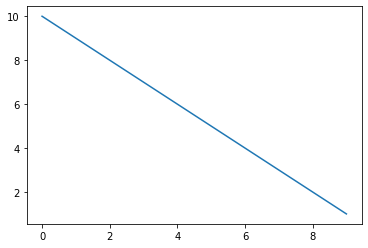

In [ ]:
plt.plot(x1,y1)

In [ ]:
np.cov([x1,y1])

array([[ 9.167, -9.167],
       [-9.167,  9.167]])

In [ ]:
np.cov([x1,x1])

array([[9.167, 9.167],
       [9.167, 9.167]])

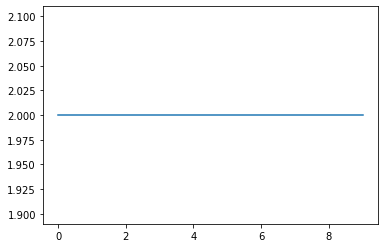

In [ ]:
x2 = np.arange(0,10)
y2 = np.array([2]*10)
plt.plot(x2,y2)

Almost all the variation in the data is from left to right.
In this case, we can take the 2-D data and project it on 1-D graph without any significant loss of data.
Both graph would signify that the variation in data is from left to right.
This can be proved from the covariance matrix below

In [ ]:
cov_mat = np.cov([x2,y2])
cov_mat

array([[9.167, 0.   ],
       [0.   , 0.   ]])

This shows X varies in X by 9.1667 units and other units there is no variation at all.

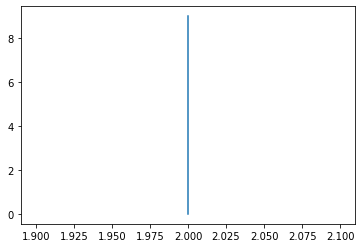

In [ ]:
x3 = np.array([2]*10)
y3 = np.arange(0,10)
plt.plot(x3,y3)

In [ ]:
np.cov([x3,y3])

array([[0.   , 0.   ],
       [0.   , 9.167]])

Similarly, This shows y varies in y by 9.1667 units and other units there is no variation at all.

# Considering the IRIS Dataset

About Iris

For the following tutorial, we will be working with the famous “Iris” dataset that has been deposited on the UCI machine learning repository 
(https://archive.ics.uci.edu/ml/datasets/Iris).

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset are:

Iris-setosa (n=50)
Iris-versicolor (n=50)
Iris-virginica (n=50)
And the four features of in Iris dataset are:

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm

In [ ]:
iris = load_iris()

In [ ]:
iris_df = pd.DataFrame(iris.data,columns=[iris.feature_names])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = iris.data

In [ ]:
X.shape

(150, 4)

# Standardizing

Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features. Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print (X_std[0:5])
print ("The shape of Feature Matrix is -",X_std.shape)

[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
The shape of Feature Matrix is - (150, 4)


In [ ]:
X_covariance_matrix = np.cov(X_std.T)

In [ ]:
X_covariance_matrix

array([[ 1.007, -0.118,  0.878,  0.823],
       [-0.118,  1.007, -0.431, -0.369],
       [ 0.878, -0.431,  1.007,  0.969],
       [ 0.823, -0.369,  0.969,  1.007]])

![alt text](https://github.com/bhattbhavesh91/pca-from-scratch-iris-dataset/raw/e59b404bae406e7f2b61d0e5791d15fa24f290b1/eigen.png "Eigen Values")

### Eigenvectors and eigenvalues.

Example of a a 2×2 covariance matrix that is given by

$$\begin{array}
{rrr}
1.07 & 0.63 \\
0.63 & 0.64 
\end{array}
$$

What this means is that
- The variance of the x variable is 1.07
- The variance of the y variable is 0.64
- The covariance between them is 0.63.

> As it is a square symmetric matrix, it can be diagonalized by choosing a new orthogonal coordinate system, given by its eigenvectors (incidentally, this is called spectral theorem); corresponding eigenvalues will then be located on the diagonal. In this new coordinate system, the covariance matrix is diagonal and looks like that:

$$\begin{array}
{rrr}
1.52 & 0 \\
0 & 0.19 
\end{array}
$$

- This means that the correlation between points is now zero. It becomes clear that the variance of any projection will be given by a weighted average of the eigenvalues.
- Consequently, the maximum possible variance (1.52) will be achieved if we simply take the projection on the first coordinate axis. It follows that the direction of the first principal component is given by the first eigenvector of the covariance matrix.

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.521 -0.377 -0.72   0.261]
 [-0.269 -0.923  0.244 -0.124]
 [ 0.58  -0.024  0.142 -0.801]
 [ 0.565 -0.067  0.634  0.524]]

Eigenvalues 
[2.938 0.92  0.148 0.021]


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs

[(2.938, array([ 0.521, -0.269,  0.58 ,  0.565])),
 (0.920, array([-0.377, -0.923, -0.024, -0.067])),
 (0.148, array([-0.72 ,  0.244,  0.142,  0.634])),
 (0.021, array([ 0.261, -0.124, -0.801,  0.524]))]

In [ ]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs

[(2.938, array([ 0.521, -0.269,  0.58 ,  0.565])),
 (0.920, array([-0.377, -0.923, -0.024, -0.067])),
 (0.148, array([-0.72 ,  0.244,  0.142,  0.634])),
 (0.021, array([ 0.261, -0.124, -0.801,  0.524]))]

In [ ]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.938085050199995
0.9201649041624864
0.1477418210449475
0.020853862176462696


In [ ]:
tot = sum(eig_vals)
print ("Total \n",tot)

var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print ("Variance captured by each component is \n",var_exp)
print(40 * '-')
print ("Cumulative variance captured as we travel each component \n",cum_var_exp)

Total 
 4.026845637583891
Variance captured by each component is 
 [72.96244541329989, 22.850761786701753, 3.668921889282865, 0.5178709107154905]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 72.962  95.813  99.482 100.   ]


The array above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (23.03%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 95.8% of the information.

In [ ]:
print ("All Eigen Values along with Eigen Vectors")
pprint.pprint(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print ('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(2.938085050199995, array([ 0.521, -0.269,  0.58 ,  0.565])),
 (0.9201649041624864, array([-0.377, -0.923, -0.024, -0.067])),
 (0.1477418210449475, array([-0.72 ,  0.244,  0.142,  0.634])),
 (0.020853862176462696, array([ 0.261, -0.124, -0.801,  0.524]))]
----------------------------------------
Matrix W:
 [[ 0.521 -0.377]
 [-0.269 -0.923]
 [ 0.58  -0.024]
 [ 0.565 -0.067]]


In [ ]:
X_std[0:5]

array([[-0.901,  1.019, -1.34 , -1.315],
       [-1.143, -0.132, -1.34 , -1.315],
       [-1.385,  0.328, -1.397, -1.315],
       [-1.507,  0.098, -1.283, -1.315],
       [-1.022,  1.249, -1.34 , -1.315]])

In [ ]:
Y = X_std.dot(matrix_w)
print (Y[0:5])

[[-2.265 -0.48 ]
 [-2.081  0.674]
 [-2.364  0.342]
 [-2.299  0.597]
 [-2.39  -0.647]]


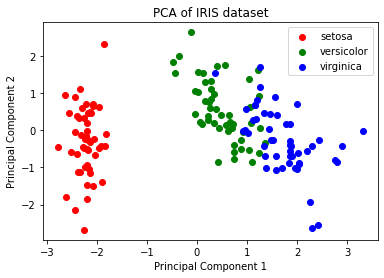

In [ ]:
pl.figure()
target_names = iris.target_names
y = iris.target
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    pl.scatter(Y[y==i,0], Y[y==i,1], c=c, label=target_name)
pl.xlabel('Principal Component 1')
pl.ylabel('Principal Component 2')
pl.legend()
pl.title('PCA of IRIS dataset')
pl.show()

## 3 components

In [ ]:
eig_pairs[0][1]

array([ 0.521, -0.269,  0.58 ,  0.565])

In [ ]:
print ("All Eigen Values along with Eigen Vectors")
pprint.pprint(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1),
                      eig_pairs[2][1].reshape(4,1)))

print ('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(2.938085050199995, array([ 0.521, -0.269,  0.58 ,  0.565])),
 (0.9201649041624864, array([-0.377, -0.923, -0.024, -0.067])),
 (0.1477418210449475, array([-0.72 ,  0.244,  0.142,  0.634])),
 (0.020853862176462696, array([ 0.261, -0.124, -0.801,  0.524]))]
----------------------------------------
Matrix W:
 [[ 0.521 -0.377 -0.72 ]
 [-0.269 -0.923  0.244]
 [ 0.58  -0.024  0.142]
 [ 0.565 -0.067  0.634]]


In [ ]:
X_std[0:5]

array([[-0.901,  1.019, -1.34 , -1.315],
       [-1.143, -0.132, -1.34 , -1.315],
       [-1.385,  0.328, -1.397, -1.315],
       [-1.507,  0.098, -1.283, -1.315],
       [-1.022,  1.249, -1.34 , -1.315]])

In [ ]:
Y = X_std.dot(matrix_w)
print (Y[0:5])

[[-2.265 -0.48  -0.128]
 [-2.081  0.674 -0.235]
 [-2.364  0.342  0.044]
 [-2.299  0.597  0.091]
 [-2.39  -0.647  0.016]]


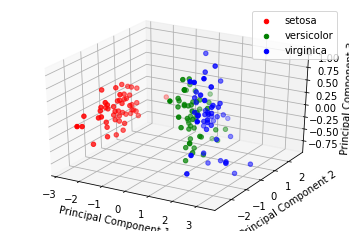

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

target_names = iris.target_names
y = iris.target
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    ax.scatter(Y[y==i,0], Y[y==i,1], Y[y==i,2], c=c, label=target_name)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

In [ ]:
len(y)

150

In [ ]:
pc_df = pd.DataFrame(Y, columns=['PC1', 'PC2', 'PC3'])
pc_df['y'] = iris.target
pc_df.head()

,PC1,PC2,PC3,y
0,-2.264703,-0.480027,-0.127706,0
1,-2.080961,0.674134,-0.234609,0
2,-2.364229,0.341908,0.044201,0
3,-2.299384,0.597395,0.091290,0
4,-2.389842,-0.646835,0.015738,0


In [ ]:
import plotly.express as px
fig = px.scatter_3d(pc_df, x='PC1', y='PC2', z='PC3',
              color='y')
fig.show()

## 1 Component

In [ ]:
print ("All Eigen Values along with Eigen Vectors")
pprint.pprint(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1)))

print ('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(2.938085050199995, array([ 0.521, -0.269,  0.58 ,  0.565])),
 (0.9201649041624864, array([-0.377, -0.923, -0.024, -0.067])),
 (0.1477418210449475, array([-0.72 ,  0.244,  0.142,  0.634])),
 (0.020853862176462696, array([ 0.261, -0.124, -0.801,  0.524]))]
----------------------------------------
Matrix W:
 [ 0.521 -0.269  0.58   0.565]


In [ ]:
X_std[0:5]

array([[-0.901,  1.019, -1.34 , -1.315],
       [-1.143, -0.132, -1.34 , -1.315],
       [-1.385,  0.328, -1.397, -1.315],
       [-1.507,  0.098, -1.283, -1.315],
       [-1.022,  1.249, -1.34 , -1.315]])

In [ ]:
Y = X_std.dot(matrix_w)
print (Y[0:5])

[-2.265 -2.081 -2.364 -2.299 -2.39 ]


In [ ]:
dummy = [0]*len(Y)

In [ ]:
dummy

In [ ]:
pl.figure()
target_names = iris.target_names
y = iris.target
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    pl.scatter(Y[y==i,0], Y[y==i,1], c=c, label=target_name)
pl.xlabel('Principal Component 1')
pl.ylabel('Principal Component 2')
pl.legend()
pl.title('PCA of IRIS dataset')
pl.show()

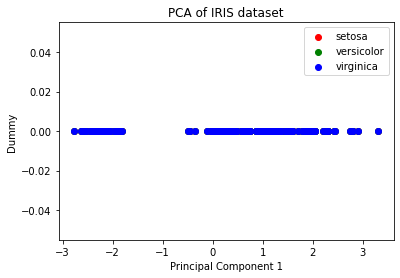

In [ ]:
pl.figure()
target_names = iris.target_names
y = iris.target
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    pl.scatter(Y,dummy, c=c, label=target_name)
pl.xlabel('Principal Component 1')
pl.ylabel('Dummy')
pl.legend()
pl.title('PCA of IRIS dataset')
pl.show()